# Triplet decoherence in singlet fission

Singlet fission is a spin-allowed transition from a singlet state (spin-0) to a pair of triplet states (spin-1).

Here, we consider the decoherence process that follows singlet fission in a molecular dimer (two molecules, $A$ and $B$, bridged together or close enough to interact with each other) to study how correlations between the triplets are lost over time.

The Hamiltonian of the system is given by the **local** Zeeman ($\mathrm{Z}$) and zero-field splitting ($\mathrm{ZFS}$) terms and the isotropic triplet-triplet exchange interaction $H_\mathrm{ee}$:

$H = H_\mathrm{Z}^{(A)}\otimes\mathbb{1}+H_\mathrm{ZFS}^{(A)}\otimes\mathbb{1}+\mathbb{1}\otimes H_\mathrm{Z}^{(B)}+\mathbb{1}\otimes H_\mathrm{ZFS}^{(B)}+H_\mathrm{ee}$,

where:

- $S_x, S_y, S_x$ are the [spin-1 operators](https://en.wikipedia.org/wiki/Spin_(physics)#Higher_spins).
- $H_\mathrm{Z} = \omega_0 S_z/2$
- $H_\mathrm{ZFS} = \sum_{i,j = x,y,z} S_i \mathcal{D}_{ij} S_j$, where:
    - $\mathcal{D}_{ij}$ are the elements of the ZFS tensor $\mathcal{D} = R \mathcal{D}_0 R^{T}$,
    - $\mathcal{D}_0 = \mathrm{diag}(-D/3+E,-D/3-E,2D/3)$
    - $D$ and $E$ are the *axial* and *transversal* components of the magnetic dipole-diple interaction
    - $R$ is some rotation matrix
- $H_\mathrm{ee} = J_0 \sum_{i=x,y,z} S_i^{(A)}\otimes S_i^{(B)}$


## Import modules and packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## System Hamiltonian

Construct the system Hamiltonian for the following parameters:

- $\omega_0 = 2$
- $D = 1$
- $E = 3$
- $R_A = \mathbb{1} $ (rotation matrix for the molecule $A$)
- $R_B =$ Euler Rotation with angles $(90,45,30)$ (rotation matrix for the molecule $B$)
- $J_0 = 10$

The spin-1 operators $S_x$, $S_y$ and $S_z$ can be found [here](https://en.wikipedia.org/wiki/Spin_(physics)#Higher_spins). </br>
[Euler rotation matrices](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.from_euler.html) can be constructed with the `spatial.transform` module of `scipy`.

In [2]:
# spin-1 operators
Sx = np.array([[0,1,0],[1,0,1],[0,1,0]])/np.sqrt(2)
Sy = np.array([[0,-1j,0],[1j,0,-1j],[0,1j,0]])/np.sqrt(2)
Sz = np.array([[1,0,0],[0,0,0],[0,0,-1]])
S = [Sx,Sy,Sz]

# import rotation matrices
from scipy.spatial.transform import Rotation as R

# function to get the Hamiltonian
def Hamiltonian(w0=1,D=1,E=1,J0=1,RA=np.eye(3),RB=np.eye(3)):
    # Zeeman term
    HzA = w0*Sz/2
    HzB = w0*Sz/2
    
    # Zero-field splitting term
    HzfsA = RA@np.diag([-D/3+E,-D/3-E,2*D/3])@RA.T
    HzfsB = RB@np.diag([-D/3+E,-D/3-E,2*D/3])@RB.T
    
    # Exchance term
    Hee = J0 * sum([np.kron(Sk,Sk) for Sk in S])
    
    # total Hamiltonian
    H = np.kron(HzA+HzfsA, np.eye(3)) + np.kron(np.eye(3), HzB+HzfsB) + Hee
    return H

# Zeeman frequency
w0 = 2

# ZFS parameters
D,E = 1,3

# Rotation matrices for molecules A and B
RA = R.from_euler('zyx', [0, 0, 0], degrees=True).as_matrix()
RB = R.from_euler('zyx', [90, 45, 30], degrees=True).as_matrix()

# Exchange strength
J0 = 10

# Hamiltonian from parameters
H = Hamiltonian(w0,D,E,J0,RA,RB)

## Hamiltonian spectrum as a function of the Zeeman interaction strength

Calculate the Hamiltonian eigenvalues $\varepsilon_k$ as a function of $\omega_0 = [0,2J_0]$

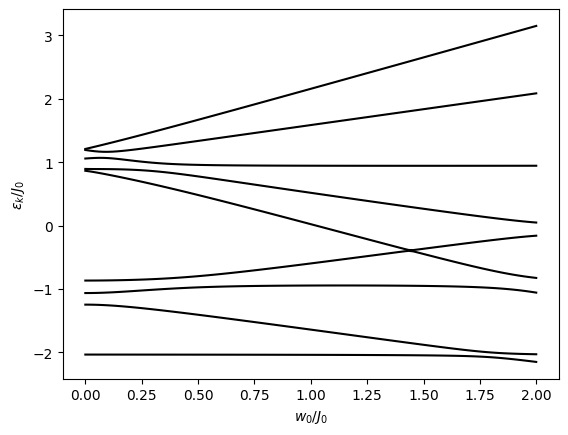

In [4]:
# Zeeman strength
w0s = np.linspace(0,2*J0,100)

# eigenvalues dataset
data = []

# iterate over w0
for w0 in w0s:
    # create the Hamiltonian
    temp = Hamiltonian(w0,D,E,J0,RA,RB)
    #eigenstates (sorted) of the Hamiltonian
    evals,_ = np.linalg.eig(temp)
    evals = np.sort(evals)
    # append results in 
    data.append(evals)

# figure
fig, ax = plt.subplots()
# plot eigenstates
for evals in np.array(data).T:
    ax.plot(w0s/J0,evals/J0, 'k-');
ax.set_xlabel(r'$w_0$/$J_0$');
ax.set_ylabel(r'$\varepsilon_k$/$J_0$');

## Singlet, triplet, and quintets

Singlet, triplet, and quintet states are defined as the simultaneous eigenstates of local $S_z$ (Zeeman term) and total $S^2 = S_x\otimes S_x+S_y\otimes S_y+ S_z\otimes S_z$ (exchange) operators. For strong exchange and intermediate Zeeman interactions, the states are ordered as:
- singlet ($S=0,m=0$),
- triplets ($S=1,m=-1,0,1$), and
- quintets ($S=2,m=-2,-1,0,1,2$)

where $(S,m)$ are the total and z-component of the spin operator.

- Calculate these states using $J_0 = 10\omega_0$, setting $D,E = 0$.
- Calculate the singlet, triplet, and quintet components for each eigenstate of the total Hamiltonian using the initial parameters.

To calculate sorted eigenvalues and eigenvectors, you can use the `eigensorter` method in `tools`.

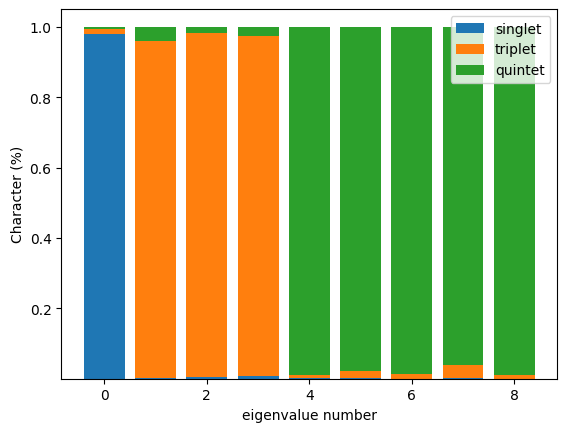

In [8]:
# import eigen-sorter
from tools import eigensorter

# strong exchange and intermediate Zeeman interactions
W0=1
Q = Hamiltonian(w0=w0,J0=10*w0,D=0,E=0)
_, TT = eigensorter(Q)

# # define singlets, triplets, and quinets
singlets = TT[0:1]
triplets = TT[1:4]
quintets = TT[4:]

# function to calculate the spin character
def character(state, character = singlets):
    operator = sum([np.outer(ket,ket.conj().T) for ket in character])
    if len(state.shape) == 1:
        return np.real(state.conj().T @ operator @ state)
    else:
        return np.trace(operator @ state)

# calculate the singlet character of some eigenstate of H
evals,evecs = eigensorter(H)

# figure
fig, ax = plt.subplots()
si = np.array([character(psi,character=singlets) for psi in evecs])
tr = np.array([character(psi,character=triplets) for psi in evecs])
qu = np.array([character(psi,character=quintets) for psi in evecs])
ax.bar(range(len(evecs)),si, label = 'singlet')
ax.bar(range(len(evecs)),tr, bottom = si, label = 'triplet')
ax.bar(range(len(evecs)),qu, bottom = si+tr, label = 'quintet')
ax.set_xlabel('eigenvalue number');
ax.set_ylabel('Character (%)')
ax.legend();

## Decoherence

Assume that the dynamics are generated by the total Hamiltonian $H$ and some **local** depolarisation mediated by the following Lindblad operators:

- $\sqrt{\gamma}\: S_x\otimes\mathbb{1}$
- $\sqrt{\gamma}\: S_y\otimes\mathbb{1}$
- $\sqrt{\gamma}\: S_z\otimes\mathbb{1}$
- $\sqrt{\gamma}\: \mathbb{1}\otimes S_x$
- $\sqrt{\gamma}\: \mathbb{1}\otimes S_y$
- $\sqrt{\gamma}\: \mathbb{1}\otimes S_z$

where $\gamma$ is some depolarisation rate.

Propagate an initial pure singlet state $|\psi_0\rangle = |S=0,m=0\rangle =:|0,0\rangle$ (using a short-hand notation) and calculate the population of the **triplets** as a function of time:

$p_1(t) = \mathrm{Tr}[\rho(t)\Pi_1]$, where $\Pi_1 = |1,-1\rangle\langle 1,-1|+|1,0\rangle\langle 1,0|+|1,1\rangle\langle 1,1|$.

Use the following values for the propagation:
- $\gamma = w0/10$
- $t_f = 10J_0$
- $dt = w0/100$

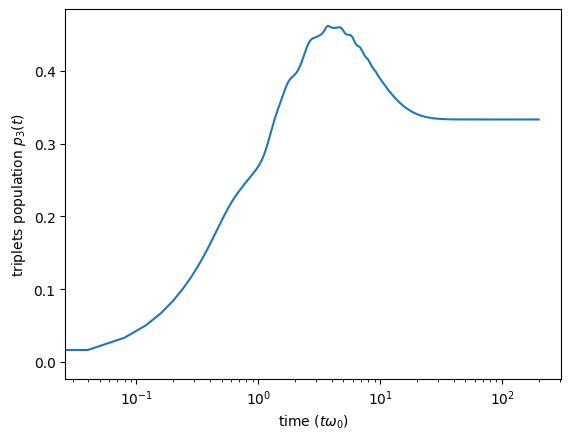

In [9]:
# initial state
rho0 = np.outer(singlets[0],singlets[0].conj().T)

# function to get the Liouville superoperator
def liouvillian(H, c_ops = []):
    d = len(H) # dimension of the system
    superH = -1j * ( np.kron(np.eye(d),H)-np.kron(H.T,np.eye(d)) ) # Hamiltonian part
    superL = sum([np.kron(L.conjugate(),L) 
                  - 1/2 * ( np.kron(np.eye(d),L.conjugate().T.dot(L)) +
                            np.kron(L.T.dot(L.conjugate()),np.eye(d)) 
                          ) for L in c_ops])
    return superH + superL

# propagation 
def prop(P,rho):
    # get system dimension
    dim = rho.shape[0]
    # propagate vectorise rho
    v = P @ np.reshape(rho,(dim*dim,1))
    # return density operator
    return np.reshape(v,(dim,dim))

# frequency
w0 = 2

# decoherence rate
gamma = w0/10

# Lindblad operators
c_ops = [np.sqrt(gamma)*np.kron(Sk,np.eye(3)) for Sk in S]+[np.sqrt(gamma)*np.kron(np.eye(3),Sk) for Sk in S]

# superoperator
super = liouvillian(H, c_ops)

# times and timestep
tf = 10*J0
dt = w0/100
times = np.arange(0,tf,dt)

# import matrix exponential
from scipy.linalg import expm

# propagator
Pdt = expm(super*dt)

# results
data = []

# initial state
rho = rho0

# propagate
for t in times:
    # append measurement
    data.append(character(rho, character = triplets))
    # new state
    rho = prop(Pdt,rho)

# figue
fig, ax = plt.subplots()
ax.plot(times*w0, data);
ax.set_xscale('log');
ax.set_xlabel(r'time ($t \omega_0$)');
ax.set_ylabel(r'triplets population $p_3(t)$');

## Entanglement decay and formation of uncorrelated triplets

We can now study the decay of correlations between triplets by measuring the *[negativity](https://en.wikipedia.org/wiki/Negativity_(quantum_mechanics))* (an entanglement measure) $\mathcal{N}[\rho(t)]$ as a function of time, where:

$\mathcal{N}[\rho] := \frac{1}{2}(||\rho^{T_1}||_1-1)$, where
-  $||X||_1 = \text{Tr}|X| = \text{Tr} \sqrt{X^\dagger X}$
-  $\rho^{T_1}$ is the partial transpose with respect to system 1.

**Note**: $\mathcal{N}=0$ for separable states, $\mathcal{N}>0$ for entangled states.

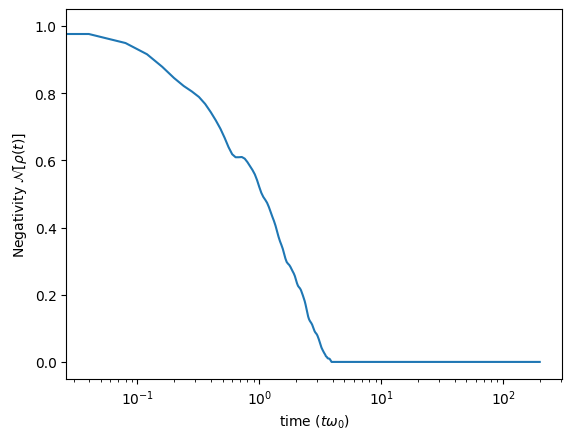

In [10]:
# negativity
def Negativity(rho):
    # partial transpose
    pt = rho.reshape((3,3,3,3)).swapaxes(0,2).reshape((9,9))
    # eigenvalue
    ls,_ = np.linalg.eig(pt)
    # return the negativity
    return 0.5*np.sum([abs(l)-l for l in ls])

# results
data = []

# initial state
rho = rho0

# propagate
for t in times:
    # append measurement
    data.append(Negativity(rho))
    # new state
    rho = prop(Pdt,rho)

# figue
fig, ax = plt.subplots()
ax.plot(times*w0, data);
ax.set_xscale('log');
ax.set_xlabel(r'time ($t \omega_0$)');
ax.set_ylabel(r'Negativity $\mathcal{N}[\rho(t)]$');